In [ ]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images

### **Step – 1: Read the video, extract frames from it and save them as images**

In [ ]:
count = 0
videoFile = "Tom and jerry.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


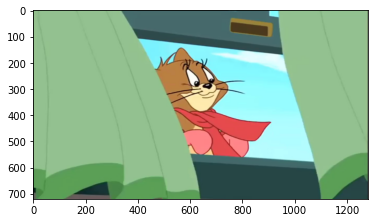

In [ ]:
img = plt.imread('frame0.jpg')
plt.imshow(img)

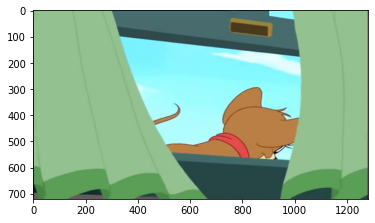

In [ ]:
img = plt.imread('frame1.jpg') 
plt.imshow(img)

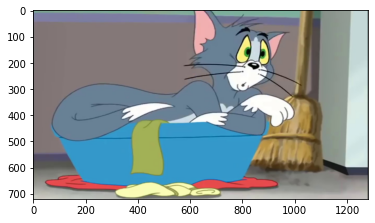

In [ ]:
img = plt.imread('frame2.jpg')
plt.imshow(img)

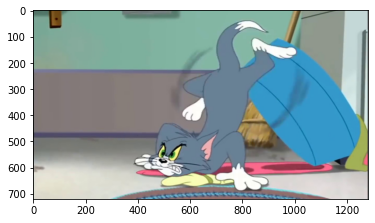

In [ ]:
img = plt.imread('frame10.jpg')
plt.imshow(img)

### **Step – 2: Label a few images for training the model**




*   0 – neither JERRY nor TOM
*   1 – for JERRY
*   2 – for TOM








In [ ]:
import pandas as pd
data = pd.read_csv('mapping.csv')     # reading the csv file
data.head()      # printing first five rows of the file


,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2


**Image_ID**: Contains the name of each image

**Class**: Contains corresponding class for each image

In [ ]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array


In [ ]:
y = data.Class
dummy_y = np_utils.to_categorical(y) # one hot encoding Classes

In [ ]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

In [ ]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X)     

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)    # preparing the validation set

### **Step 3: Building the model**

In [ ]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    # include_top=False to remove the top layer

In [ ]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

((208, 7, 7, 512), (90, 7, 7, 512))

In [ ]:
X_train = X_train.reshape(208, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(90, 7*7*512)


In [ ]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()



1.   Building the model
2.   Compiling the model
1.   Training the model







In [ ]:
# i. Building the model
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(3, activation='softmax'))    # output layer

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3075      
Total params: 25,694,211
Trainable params: 25,694,211
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))


Epoch 1/100
7/7 [==============================] - 1s 45ms/step - loss: 1.0229 - accuracy: 0.4412 - val_loss: 0.6035 - val_accuracy: 0.8000
Epoch 2/100
7/7 [==============================] - 0s 17ms/step - loss: 0.3406 - accuracy: 0.9476 - val_loss: 0.4176 - val_accuracy: 0.8556
Epoch 3/100
7/7 [==============================] - 0s 16ms/step - loss: 0.1574 - accuracy: 0.9545 - val_loss: 0.3491 - val_accuracy: 0.8778
Epoch 4/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0723 - accuracy: 0.9825 - val_loss: 0.2754 - val_accuracy: 0.8778
Epoch 5/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0455 - accuracy: 0.9962 - val_loss: 0.2537 - val_accuracy: 0.9222
Epoch 6/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0328 - accuracy: 0.9931 - val_loss: 0.2663 - val_accuracy: 0.8667
Epoch 7/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0232 - accuracy: 0.9974 - val_loss: 0.2873 - val_accuracy: 0.8667
Epoch 8/100
7/7 [===

**Calculating the screen time**

In [ ]:
count = 0
videoFile = "Tom and Jerry 3.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [ ]:
test = pd.read_csv('test.csv')


In [ ]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [ ]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [ ]:
# preprocessing the images
test_image = preprocess_input(test_image)

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)

# converting the images to 1-D form
test_image = test_image.reshape(186, 7*7*512)

# zero centered images
test_image = test_image/test_image.max()

In [ ]:
predictions = model.predict_classes(test_image)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print("The screen time of JERRY is", predictions[predictions==1].shape[0], "seconds")
print("The screen time of TOM is", predictions[predictions==2].shape[0], "seconds")

The screen time of JERRY is 114 seconds
The screen time of TOM is 72 seconds
